In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Declare constants for extraction
root_path = "spiox_mphys/data_upload/final_set/"
dir_structure = {
    "results_no_cent_no_param": "Light Curves Only",
    "results_no_cent_use_param": "LCs and SDPs",
    "results_use_cent_no_param": "LCs and Centroids",
    "results_use_cent_use_param": "LCs, Centroids and SDPs"
}
models = range(1, 9)

In [3]:
# Extract raw data
raw_data = {}
for group in dir_structure:
    raw_data[group] = []
    for model in models:
        dir_path = root_path+group+"/analysis/ml_output_"+str(model)+"/"
        ground_truth_path = dir_path+"gt_val.npy"
        prediction_path = dir_path+"pred_val.npy"
        data = {"ground_truth": np.load(ground_truth_path), "predictions": np.load(prediction_path)};
        data["predictions"] *= 100
        raw_data[group].append(data)

In [4]:
print(raw_data)

{'results_no_cent_no_param': [{'ground_truth': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'predictions': array([ 8.204704  ,  0.1951629 ,  0.90287447, ...,  4.311492  ,
       10.966449  , 29.7871    ], dtype=float32)}, {'ground_truth': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'predictions': array([18.721315  ,  0.14933449,  0.5259408 , ...,  5.892567  ,
       38.929073  , 44.032394  ], dtype=float32)}, {'ground_truth': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'predictions': array([ 5.272782  ,  0.7769066 ,  0.35232693, ...,  1.8035855 ,
        7.7115564 , 48.6341    ], dtype=float32)}, {'ground_truth': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'predictions': array([ 5.16118   ,  0.55727357,  0.6058829 , ...,  2.9770215 ,
       11.977218  , 28.528046  ], dtype=float32)}, {'ground_truth': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'predictions': array([ 7.6119027 ,  0.37380794,  0.23705529, ...,  3.512127  ,
       17.546818  , 4

In [5]:
# Calculate precision recall scores
# Sort predictions by thresholds
print("Calculating precision-recall scores")
precision_recall_data = {}
for group in raw_data:
    precision_recall_data[group] = []
    count = 0
    print("Managing group: "+group)
    for run in raw_data[group]:
        precision, recall = np.zeros(100), np.zeros(100)
        for threshold in range(0, 100):
            pred_byte = np.zeros(len(run["predictions"]))
            for j, val in enumerate(run["predictions"]):
                pred_byte[j] = 1 if val > threshold else 0
            precision[threshold] = precision_score(run["ground_truth"], pred_byte)
            recall[threshold] = recall_score(run["ground_truth"], pred_byte)
        count += 1
        print("Completed "+str(count)+"/8")
        precision_recall_data[group].append({"precision": precision, "recall": recall})
print("Finished")

Calculating precision-recall scores
Managing group: results_no_cent_no_param


C:\Users\georg\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Completed 1/8
Completed 2/8
Completed 3/8
Completed 4/8
Completed 5/8
Completed 6/8
Completed 7/8
Completed 8/8
Managing group: results_no_cent_use_param
Completed 1/8
Completed 2/8
Completed 3/8
Completed 4/8
Completed 5/8
Completed 6/8
Completed 7/8
Completed 8/8
Managing group: results_use_cent_no_param
Completed 1/8
Completed 2/8
Completed 3/8
Completed 4/8
Completed 5/8
Completed 6/8
Completed 7/8
Completed 8/8
Managing group: results_use_cent_use_param
Completed 1/8
Completed 2/8
Completed 3/8
Completed 4/8
Completed 5/8
Completed 6/8
Completed 7/8
Completed 8/8


In [6]:
# Create higher resolution data near end
high_density_precision_recall_data = {}
for group in raw_data:
    high_density_precision_recall_data[group] = []
    run_count = 0
    print("Managing group: "+group)
    for run in raw_data[group]:
        precision, recall = np.zeros(80), np.zeros(80)
        count = 0
        for threshold in np.arange(80, 100, 0.25):
            pred_byte = np.zeros(len(run["predictions"]))
            for j, val in enumerate(run["predictions"]):
                pred_byte[j] = 1 if val > threshold else 0
            precision[count] = precision_score(run["ground_truth"], pred_byte)
            recall[count] = recall_score(run["ground_truth"], pred_byte)
            count += 1
        run_count += 1
        print("Completed "+str(run_count)+"/8")
        high_density_precision_recall_data[group].append({"precision": precision, "recall": recall})
print("Finished")

Managing group: results_no_cent_no_param
Completed 1/8
Completed 2/8
Completed 3/8
Completed 4/8
Completed 5/8
Completed 6/8
Completed 7/8
Completed 8/8
Managing group: results_no_cent_use_param
Completed 1/8
Completed 2/8
Completed 3/8
Completed 4/8
Completed 5/8
Completed 6/8
Completed 7/8
Completed 8/8
Managing group: results_use_cent_no_param
Completed 1/8
Completed 2/8
Completed 3/8
Completed 4/8
Completed 5/8
Completed 6/8
Completed 7/8
Completed 8/8
Managing group: results_use_cent_use_param
Completed 1/8
Completed 2/8
Completed 3/8
Completed 4/8
Completed 5/8
Completed 6/8
Completed 7/8
Completed 8/8
Finished


In [14]:
# Create higher resolution data near end
hh_density_precision_recall_data = {}
for group in raw_data:
    hh_density_precision_recall_data[group] = []
    run_count = 0
    print("Managing group: "+group)
    for run in raw_data[group]:
        precision, recall = np.zeros(160), np.zeros(160)
        count = 0
        for threshold in np.arange(80, 100, 0.125):
            pred_byte = np.zeros(len(run["predictions"]))
            for j, val in enumerate(run["predictions"]):
                pred_byte[j] = 1 if val > threshold else 0
            precision[count] = precision_score(run["ground_truth"], pred_byte)
            recall[count] = recall_score(run["ground_truth"], pred_byte)
            count += 1
        run_count += 1
        print("Completed "+str(run_count)+"/8")
        hh_density_precision_recall_data[group].append({"precision": precision, "recall": recall})
print("Finished")

Managing group: results_no_cent_no_param


C:\Users\georg\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Completed 1/8
Completed 2/8
Completed 3/8
Completed 4/8
Completed 5/8
Completed 6/8
Completed 7/8
Completed 8/8
Managing group: results_no_cent_use_param
Completed 1/8
Completed 2/8
Completed 3/8
Completed 4/8
Completed 5/8
Completed 6/8
Completed 7/8
Completed 8/8
Managing group: results_use_cent_no_param
Completed 1/8
Completed 2/8
Completed 3/8
Completed 4/8
Completed 5/8
Completed 6/8
Completed 7/8
Completed 8/8
Managing group: results_use_cent_use_param
Completed 1/8
Completed 2/8
Completed 3/8
Completed 4/8
Completed 5/8
Completed 6/8
Completed 7/8
Completed 8/8
Finished


In [8]:
def plotGroup(group, title, axis, high_density = False):
    data = high_density_precision_recall_data[group] if high_density else precision_recall_data[group]
    for i in range(0, 8):
        x = data[i]["recall"]
        y = data[i]["precision"]
        axis.plot(x, y, "C"+str(i), alpha=0.5, ms=2)
#     axis.xlabel("Recall")
#     axis.ylabel("Precision")
    axis.set_title(title)

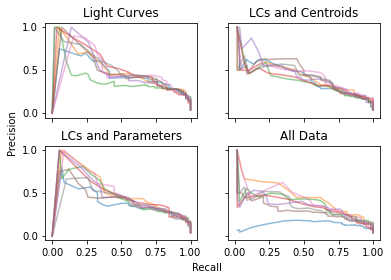

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex="all", sharey="all")
plotGroup("results_no_cent_no_param", "Light Curves", ax1)
plotGroup("results_no_cent_use_param", "LCs and Centroids", ax2)
plotGroup("results_use_cent_no_param", "LCs and Parameters", ax3)
plotGroup("results_use_cent_use_param", "All Data", ax4)
fig.text(0.5, 0.03, "Recall", ha='center', va='center')
fig.text(0.06, 0.5, "Precision", ha='right', va='center', rotation='vertical')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.savefig("report/Precision-Recall-Curves-Cross-Val", dpi=300)

In [16]:
# Find medians and plot
def fetchMedianData(high_density = False, hhd = False):
    median_plot_data = {}
    raw_data = high_density_precision_recall_data if high_density else precision_recall_data
    entry_count = 80 if high_density else 100
    if (hhd):
        raw_data = hh_density_precision_recall_data
        entry_count = 160
    for group in raw_data:
        precision = []
        recall = []
        group_data = raw_data[group]
        for i in range(0, entry_count):
            prec_arr, rec_arr = np.zeros(8), np.zeros(8)
            for j in range(0, 8):
                prec_arr[j] = group_data[j]["precision"][i]
                rec_arr[j] = group_data[j]["recall"][i]
            precision.append(np.median(prec_arr))
            recall.append(np.median(rec_arr))
        median_plot_data[group] = {"precision": precision, "recall": recall}
    return median_plot_data

In [11]:
# len(arr) is max cut off not maximum index i.e. [:len(arr) - 1] != [:len(arr)]
def plotMedians(data, legend, cutoffs):
    count = 0
    for group in data:
        plt.plot(data[group]["recall"][:cutoffs[count]], data[group]["precision"][:cutoffs[count]], "C"+str(count), alpha=0.7)
        count += 1
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Medians of different groups plotted")
    plt.legend(legend)
    plt.ylim(0,1)

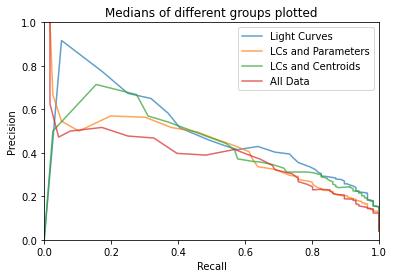

In [12]:
cutoffs = [100, 100, 100, 100]
legend = ["Light Curves", "LCs and Parameters", "LCs and Centroids", "All Data"]
plotMedians(fetchMedianData(), legend, cutoffs)
plt.xlim(0, 1)
plt.savefig("report/Median Precision-Recall cross val")

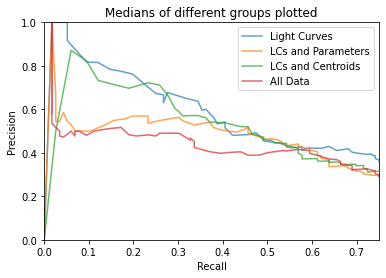

In [13]:
# Plot high density medians
cutoffs = [80, 80, 80, 80]
legend = ["Light Curves", "LCs and Parameters", "LCs and Centroids", "All Data"]
plotMedians(fetchMedianData(True), legend, cutoffs)
plt.xlim(0, 0.75)
plt.savefig("report/Top end median precision-recall cross val")

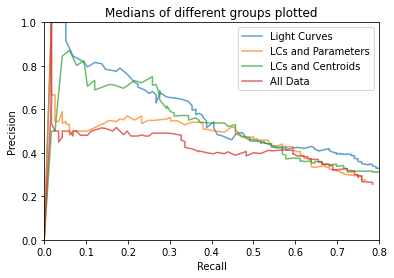

In [52]:
# Plot hh density medians
pretty_cutoffs = [134, 158, 130, 159]
no_cutoffs = [160, 160, 160, 160]
legend = ["Light Curves", "LCs and Parameters", "LCs and Centroids", "All Data"]
plotMedians(fetchMedianData(True, True), legend, no_cutoffs)
plt.xlim(0, 0.8)
plt.savefig("report/tte_median_pr")

In [61]:
# Produce confusion matrix values
threshold = 85
confusion_matrix_data = {}
for group in raw_data:
    fp_arr = []
    fn_arr = []
    tp_arr = []
    tn_arr = []
    for run in raw_data[group]:
        false_positive = 0
        false_negative = 0
        true_positive = 0
        true_negative = 0 
        pred_arr = np.zeros(len(run["predictions"]))
        for i, val in enumerate(run["predictions"]):
            pred_byte = 1 if val > threshold else 0
            pred_arr[i] = pred_byte
            gt_byte = run["ground_truth"][i]
            if (gt_byte == pred_byte):
                if (gt_byte):
                    true_positive += 1
                else:
                    true_negative += 1
            else:
                if (gt_byte):
                    false_negative += 1
                else:
                    false_positive += 1
        fp_arr.append(false_positive)
        fn_arr.append(false_negative)
        tp_arr.append(true_positive)
        tn_arr.append(true_negative)
    confusion_matrix_data[group] = {
        "fp": np.median(fp_arr),
        "fn": np.median(fn_arr),
        "tp": np.median(tp_arr),
        "tn": np.median(tn_arr)
    }

In [62]:
# Print confusion matrices pretty
for group in confusion_matrix_data:
    print(group)
    print("          actual   ")
    print("     | neg.  | pos.")
    print("neg. | "+str(confusion_matrix_data[group]["tn"])+" | "+str(confusion_matrix_data[group]["fn"]))
    print("pos. | "+str(confusion_matrix_data[group]["fp"])+" | "+str(confusion_matrix_data[group]["tp"]))

results_no_cent_no_param
          actual   
     | neg.  | pos.
neg. | 1300.5 | 15.5
pos. | 60.5 | 42.5
results_no_cent_use_param
          actual   
     | neg.  | pos.
neg. | 1277.5 | 18.0
pos. | 83.5 | 40.0
results_use_cent_no_param
          actual   
     | neg.  | pos.
neg. | 1286.5 | 18.5
pos. | 74.5 | 39.5
results_use_cent_use_param
          actual   
     | neg.  | pos.
neg. | 1277.0 | 18.0
pos. | 84.0 | 40.0


In [64]:
# Produce confusion matrix values
total_data = {}
tce_amount = 0
for group in raw_data:
    print("Processing group: "+group)
    group_data = []
    for run in raw_data[group]:
        run_data = {
            "fp": [],
            "fn": [],
            "tp": [],
            "tn": []
        }
        for threshold in range(0, 100):
            tce_amount = len(run["predictions"])
            threshold_data = {
                "fp": 0,
                "fn": 0,
                "tp": 0,
                "tn": 0
            }
            pred_arr = np.zeros(tce_amount)
            for i, val in enumerate(run["predictions"]):
                pred_byte = 1 if val > threshold else 0
                pred_arr[i] = pred_byte
                gt_byte = run["ground_truth"][i]
                key = "fp"
                if (gt_byte == pred_byte):
                    if (gt_byte):
                        key = "tp"
                    else:
                        key = "tn"
                else:
                    if (gt_byte):
                        key = "fn"
                threshold_data[key] += 1
            for key in threshold_data:
                run_data[key].append(threshold_data[key])
        group_data.append(run_data)
    # Find median
    print("Mostly calculated...")
    comprehensive_outcome_data = {}
    for key in group_data[0]:
        comprehensive_outcome_data[key] = []
        for i in range(0, 100):
            test_arr = []
            for j in range(0, 8):
                test_arr.append(group_data[j][key][i])
            comprehensive_outcome_data[key].append(np.median(test_arr))
    total_data[group] = comprehensive_outcome_data

Processing group: results_no_cent_no_param
Mostly calculated...
Processing group: results_no_cent_use_param
Mostly calculated...
Processing group: results_use_cent_no_param
Mostly calculated...
Processing group: results_use_cent_use_param
Mostly calculated...


In [77]:
# Produce high density confusion data
high_density_data = {}
for group in raw_data:
    print(f"Processing group {group}")
    group_data = []
    for run in raw_data[group]:
        run_data = {
            "fp": [],
            "tp": [],
            "fn": [],
            "tn": []
        }
        for threshold in np.arange(0, 20, 0.25):
            tce_amount = len(run["predictions"])
            threshold_data = {
                "fp": 0,
                "tp": 0,
                "fn": 0,
                "tn": 0
            }
            for i, val in enumerate(run["predictions"]):
                pred_byte = 1 if val > threshold else 0
                gt_byte = run["ground_truth"][i]
                key = "fp"
                if (gt_byte == pred_byte):
                    if (gt_byte == 1):
                        key = "tp"
                    else:
                        key = "tn"
                else:
                    if (gt_byte == 1):
                        key = "fn"
                threshold_data[key] += 1
            for key in threshold_data:
                run_data[key].append(threshold_data[key])
        group_data.append(run_data)
    # Find median
    print("Mostly calculated...")
    comprehensive_outcome_data = {}
    for key in group_data[0]:
        comprehensive_outcome_data[key] = []
        for i in range(0, 80):
            test_arr = []
            for j in range(0, 8):
                test_arr.append(group_data[j][key][i])
            comprehensive_outcome_data[key].append(np.median(test_arr))
    high_density_data[group] = comprehensive_outcome_data
    print("Finished processing group")

Processing group results_no_cent_no_param
Mostly calculated...
Finished processing group
Processing group results_no_cent_use_param
Mostly calculated...
Finished processing group
Processing group results_use_cent_no_param
Mostly calculated...
Finished processing group
Processing group results_use_cent_use_param
Mostly calculated...
Finished processing group


In [79]:
print(high_density_data)

{'results_no_cent_no_param': {'fp': [1361.0, 1162.0, 1095.5, 1046.0, 997.5, 953.0, 923.0, 889.5, 863.5, 828.5, 810.5, 789.0, 769.5, 746.5, 725.5, 708.0, 687.5, 671.5, 651.5, 638.0, 624.0, 609.5, 597.0, 591.5, 583.0, 573.0, 564.0, 555.0, 545.5, 534.0, 526.0, 519.5, 512.0, 505.5, 500.0, 493.5, 485.0, 476.0, 468.5, 461.0, 456.5, 451.5, 447.0, 445.5, 442.0, 440.5, 437.0, 434.5, 432.0, 429.0, 426.5, 424.0, 422.0, 420.0, 417.5, 416.5, 413.0, 410.5, 407.5, 405.0, 403.5, 400.5, 395.5, 393.5, 391.0, 389.5, 388.0, 387.0, 387.0, 383.0, 381.5, 380.5, 378.0, 377.0, 375.0, 373.5, 371.0, 369.5, 368.5, 368.0], 'tp': [58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 5

In [67]:
 def plotResults(group):
    legend = ["False Positive", "False Negative", "True Positive", "True Negative"]
    for key in total_data[group]:
        plt.plot(range(0, 100), total_data[group][key])
    plt.legend(legend)

In [68]:
def plotEndResults(group):
    legend = []
    for key in total_data[group]:
        plt.plot(range(0, 100), total_data[group][key])
        legend.append(key)
    plt.legend(legend)

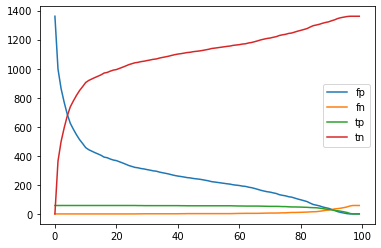

In [32]:
plotEndResults("results_no_cent_no_param")

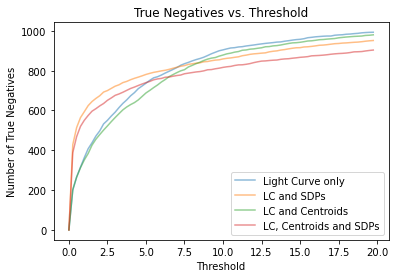

In [69]:
legend = ["Light Curve only", "LC and SDPs", "LC and Centroids", "LC, Centroids and SDPs"]
for group in total_data:
    plt.plot(np.arange(0, 20, 0.25), high_density_data[group]["tn"], alpha=0.5)
plt.legend(legend)
plt.title("True Negatives vs. Threshold")
plt.ylabel("Number of True Negatives")
plt.xlabel("Threshold")
plt.savefig("report/tn_behaviour_lt")

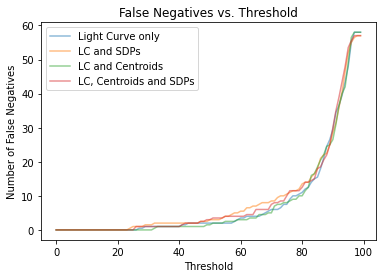

In [80]:
legend = ["Light Curve only", "LC and SDPs", "LC and Centroids", "LC, Centroids and SDPs"]
for group in total_data:
    plt.plot(np.arange(0, 100), total_data[group]["fn"], alpha=0.5)
plt.legend(legend)
plt.title("False Negatives vs. Threshold")
plt.ylabel("Number of False Negatives")
plt.xlabel("Threshold")
plt.savefig("report/fn_behaviour_lt")

In [36]:
def plotGroup():
    data = high_density_precision_recall_data
    legend = []
    for i in range(0, 8):
        x = data[i]["recall"]
        y = data[i]["precision"]
        plt.plot(x, y, "C"+str(i), alpha=0.5, ms=2)
        legend.append(i)
    plt.legend(legend)
plotGroup()

KeyError: 0

In [41]:
group_aps = {}
for group in raw_data:
    aps = []
    for run in raw_data[group]:
        ap = average_precision_score(run["ground_truth"], run["predictions"])
        pred_byte = np.zeros(len(run["predictions"]))
        threshold = 90
        for j, val in enumerate(run["predictions"]):
            pred_byte[j] = 1 if val > threshold else 0
        precision = precision_score(run["ground_truth"], pred_byte)
        recall = recall_score(run["ground_truth"], pred_byte)
        acc_score = balanced_accuracy_score(run["ground_truth"], pred_byte)
        aps.append(ap)
        print(f"AP: {ap} AC: {acc_score}")
    median = np.median(aps)
    mean = np.mean(aps)
    print(f"Median {median} Mean {mean}")
    group_aps[group] = {"median": median, "mean": mean}

AP: 0.4953655730718567 AC: 0.697712128505916
AP: 0.5207796938116964 AC: 0.7622691226025489
AP: 0.4006517738867134 AC: 0.5652917479540905
AP: 0.5542361445254433 AC: 0.7318275101978768
AP: 0.542024736448469 AC: 0.7886695887912032
AP: 0.5140381234324503 AC: 0.7453951202209329
AP: 0.5619518935483031 AC: 0.6725848133978566
AP: 0.5506053481104827 AC: 0.7360396767083027
Median 0.5314022151300828 Mean 0.5174566608544269
AP: 0.4423263566537209 AC: 0.6091299500874103
AP: 0.4290472740915343 AC: 0.7210025589703312
AP: 0.38531453503624075 AC: 0.7974612987407839
AP: 0.38111453880737245 AC: 0.7541868301705136
AP: 0.46010172193761945 AC: 0.6736869441840432
AP: 0.47129971261762443 AC: 0.6008766373609669
AP: 0.44238703242838084 AC: 0.7956497504370519
AP: 0.42734828290796045 AC: 0.7607996148876333
Median 0.4356868153726276 Mean 0.4298674318100567
AP: 0.4361184733758671 AC: 0.6535065494438673
AP: 0.5575835116139202 AC: 0.8095847373888367
AP: 0.5121969975236287 AC: 0.6357267729103854
AP: 0.4963611608975237

In [45]:
for group in group_aps:
    print(f"{group}: mdn - {group_aps[group]['median']} mean - {group_aps[group]['mean']}")

results_no_cent_no_param: mdn - 0.5314022151300828 mean - 0.5174566608544269
results_no_cent_use_param: mdn - 0.4356868153726276 mean - 0.4298674318100567
results_use_cent_no_param: mdn - 0.5042790792105762 mean - 0.5028141571689118
results_use_cent_use_param: mdn - 0.3670924438762783 mean - 0.35748077905439524
